In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
base_credit = pd.read_csv('credit_data.csv')
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [3]:
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [5]:
base_credit.tail(8)

,clientid,income,age,loan,default
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [6]:
# cliente com a maior renda
base_credit[base_credit['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [7]:
# cliente com a menor renda
base_credit[base_credit['income'] <= 20015.48947]

,clientid,income,age,loan,default
1452,1453,20014.48947,43.202204,2426.306223,0


In [8]:
# cliente com a menor dívida
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


In [9]:
# cliente com a maior dívida
base_credit[base_credit['loan'] >= 13766.051239]

,clientid,income,age,loan,default
1378,1379,69755.320163,44.543682,13766.051239,0


In [10]:
# cliente com a mior idade
maior_idade = base_credit['age'].max()
maior_idade

63.971795841120205

In [11]:
base_credit[base_credit['age'] >= maior_idade]

,clientid,income,age,loan,default
1998,1999,43756.056605,63.971796,1622.722598,0


In [12]:
# cliente com menor idade
menor_idade = base_credit['age'].min()
menor_idade

-52.4232799196616

In [13]:
# há uma idade negativa. Dessa forma, isso precisa ser alterado
base_credit[base_credit['age'] <= menor_idade]

,clientid,income,age,loan,default
21,22,32197.620701,-52.42328,4244.057136,0


#

#### Visualização de dados

In [14]:
base_credit['default'].unique()

array([0, 1], dtype=int64)

In [15]:
# outra forma
np.unique(base_credit['default'])

array([0, 1], dtype=int64)

In [16]:
base_credit['default'].value_counts()


# 1717 - pessoas que pagam o empréstimo
# 283 - pessoas que não pagam o empréstimo

0    1717
1     283
Name: default, dtype: int64

In [17]:
# outra maneira
np.unique(base_credit['default'], return_counts=True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

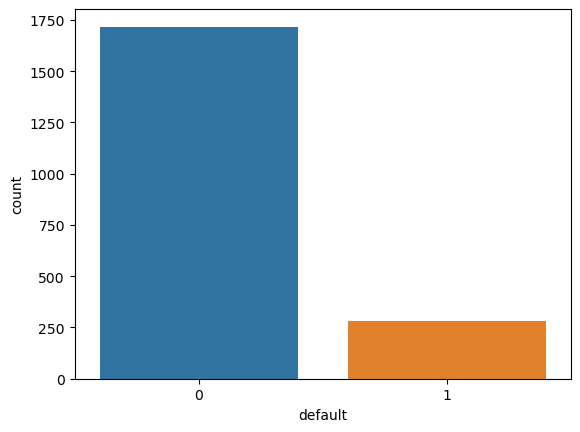

In [18]:
sns.countplot(x = base_credit['default']);
# os dados estão desbalanceados. Logo, será necessário mexer neles

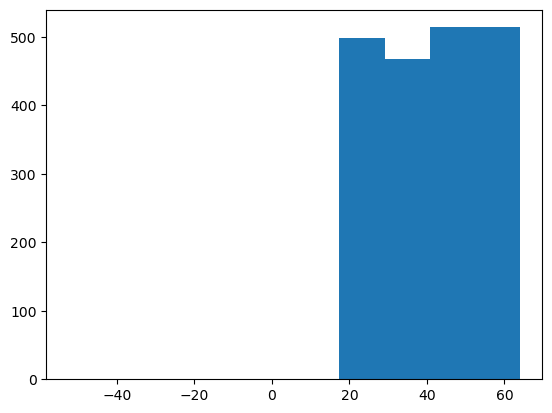

In [19]:
plt.hist(x = base_credit['age']);

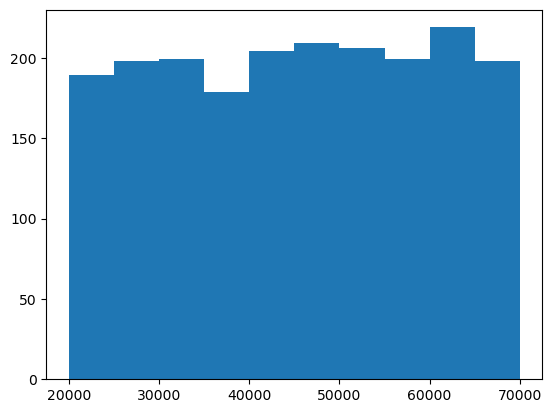

In [20]:
plt.hist(x = base_credit['income']);

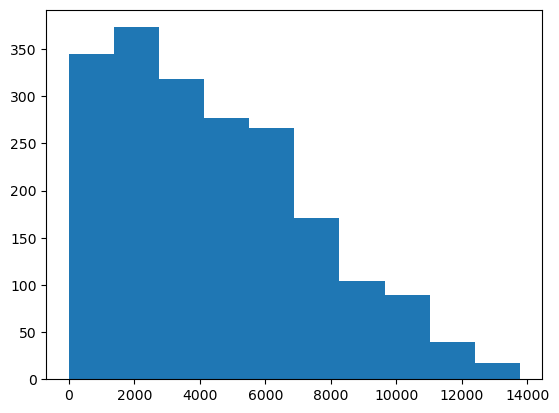

In [21]:
plt.hist(x = base_credit['loan']);

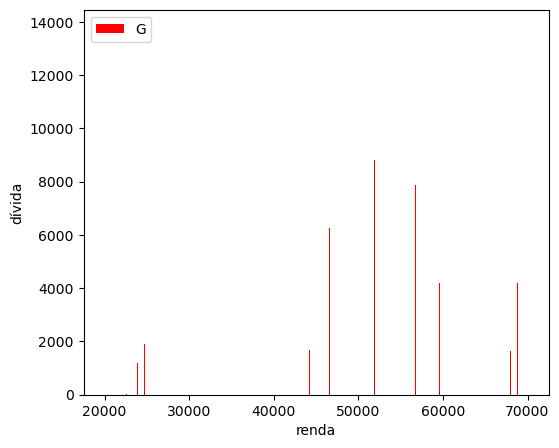

In [22]:
plt.rcParams["figure.figsize"] = (6,5)
plt.bar(base_credit['income'], base_credit['loan'], color='red')
plt.xlabel('renda')
plt.ylabel('dívida')
plt.legend('Gráfico')
plt.show()

In [23]:
# g´rafico de dispersão
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico

#

#### Tratando valores inconsistentes

In [24]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [25]:
# outra forma
base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [26]:
# indices com idade negativa
base_credit[base_credit['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [27]:
# apagar somente os registros menores do que 0

base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [28]:
base_credit3[base_credit3['age'] < 0]

,clientid,income,age,loan,default


In [29]:
base_credit3.loc[base_credit3['age'] < 0]

,clientid,income,age,loan,default


#### Há algumas formas de modificar esses valores, por exemplo:

 - Ligar diretamente para o cliente e verificar sua idade;
 - Apagar esses registros;
 - Substituir esses valores pela média das idades daquela coluna

 ##### Logo, apagar os dados pode prejudicar o algoritmo de aprendizagem, pois quanto maior a quantidade de dados, melhor será o resultado

In [30]:
# média de todas as colunas
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [31]:
# essa maneira considera os valores com idades negativas
base_credit['age'].mean()

40.80755937840458

In [32]:
# precisamos fazer a média somente com valores positivos
base_credit['age'][base_credit['age'] < 0]

15   -28.218361
21   -52.423280
26   -36.496976
Name: age, dtype: float64

In [33]:
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [34]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92
# precisamos recarregar a base de dados para que atualize somente a coluna das idades

# base_credit.loc[base_credit['age'] < 0] = 40.92  --> forma errada

In [35]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [36]:
# há um erro aqui, pois acabamos de atribuir o valor ma média das
# idades para todas as colunas
base_credit[base_credit['age'] == 40.92]



,clientid,income,age,loan,default
15,16,50501.726689,40.92,3977.287432,0
21,22,32197.620701,40.92,4244.057136,0
26,27,63287.038908,40.92,9595.286289,0


In [37]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


#

#### Tratamento de dados faltantes

In [38]:
# age possui 3 registros vazios
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [39]:
# passar um filtro que localiza os clientes com idade igual a NaN
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [40]:
base_credit.loc[base_credit['age'].isnull()]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [41]:
base_credit['age'].isnull().sum()

3

In [42]:
# preenchimento automático. fill - preencher  /  na - vazio
# inplace=True --> significa que estou alterando a minha coluna
# caso contrário, essa operação só seria executada na memória.
# Portanto, não modificaria a minha base de dados
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)


In [43]:
# valores atualizados
base_credit['age'].isnull().sum()

0

In [44]:
base_credit.loc[base_credit['age'].isnull()]

,clientid,income,age,loan,default


In [45]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


#

#### Separação de variáveis: previsores e classe

In [46]:
# iloc[] - permite selecionar linhas e colunas
# o values converte para o formato numpy
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [47]:
print(type(X_credit))
print(X_credit.shape)

<class 'numpy.ndarray'>
(2000, 3)


In [48]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
y_credit.shape

(2000,)

In [50]:
type(y_credit)

numpy.ndarray

#### Escalonamento dos atributos

In [51]:
# renda(income) -------   idade(age) -------  dívida(loan)
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [52]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

##### Percebe-se que existe valores mais altos do que outros, ou seja, o algoritmo pode colocar um peso maior para valores mais altos. Dessa forma, por trás dos algoritmos de aprendizagem de máquina, ocorre várias operações de soma e multiplicação

In [53]:
# vamos importar uma biblioteca que realiza a padronização dos dados

from sklearn.preprocessing import StandardScaler

In [54]:
scaler_credit = StandardScaler()
# fit - encaixar e transformar os dados em um mesma base
X_credit = scaler_credit.fit_transform(X_credit)

In [55]:
# renda(income) -------   idade(age) -------  dívida(loan)
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [56]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

#

#### Base census

In [57]:
base_census = pd.read_csv('census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [59]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [60]:
np.unique(base_census['income'])

array([' <=50K', ' >50K'], dtype=object)

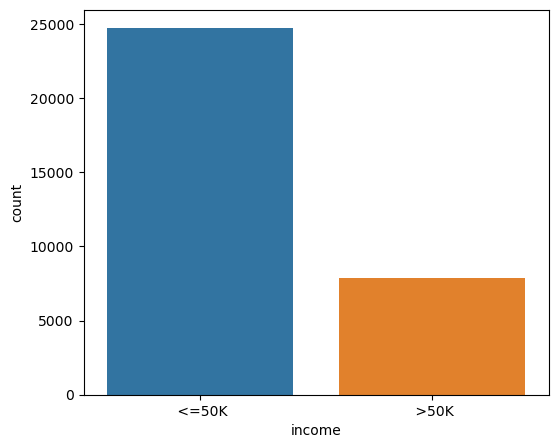

In [61]:
sns.countplot(x = base_census['income']);

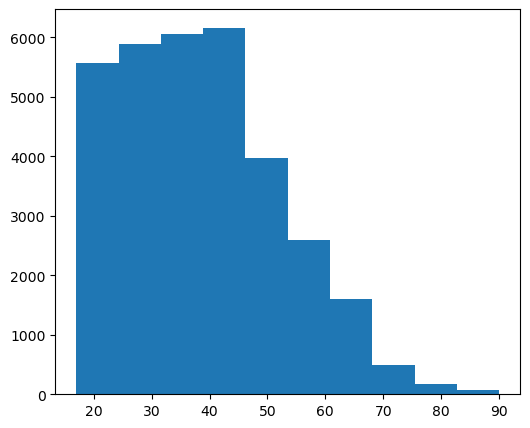

In [62]:
plt.hist(x = base_census['age']);

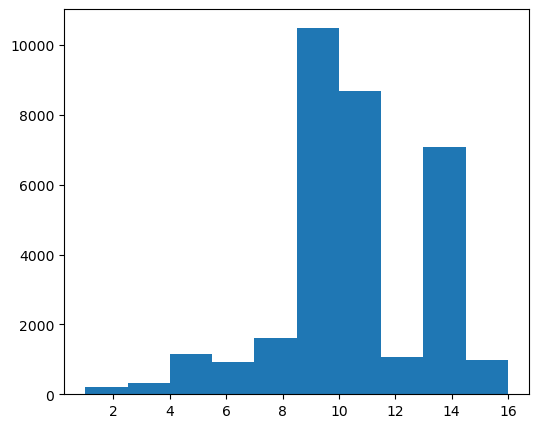

In [63]:
plt.hist(x = base_census['education-num']);

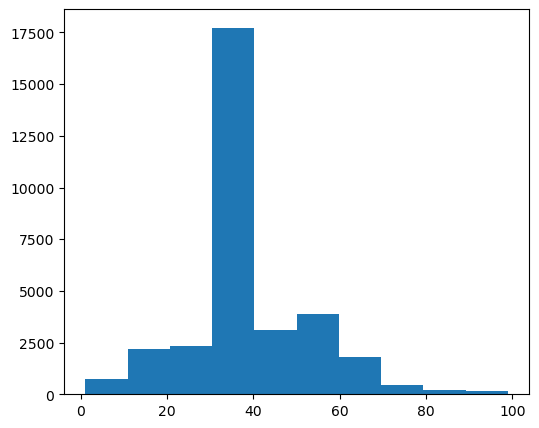

In [64]:
plt.hist(x = base_census['hour-per-week']);

In [69]:
grafico = px.treemap(base_census, path=['occupation', 'workclass', 'age'])
grafico.show()

In [70]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'workclass'])
grafico.show()

#### Divisão entre previsores e classe

In [75]:
X_census = base_census.iloc[:, 0:14].values

X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [76]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

#### LabelEncoder --> permite transofrmar valores do tipo string em um número. Esse tipo de procedimento pode gerar uma tendência para o algoritmo de aprendizagem de máquina, ou seja, o índice 0 pode ser menos importante do que o índice 50; gerando, portanto, uma dificuldade em fazer boas predições

In [77]:
from sklearn.preprocessing import LabelEncoder

In [84]:
label_encoder_test = LabelEncoder()
teste = label_encoder_test.fit_transform(X_census[:, 1])

X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [85]:
label_encoder_workclass = LabelEncoder()

label_encoder_education = LabelEncoder()

label_encoder_marital = LabelEncoder()

label_encoder_occupation = LabelEncoder()

label_encoder_relationship = LabelEncoder()

label_encoder_race = LabelEncoder()

label_encoder_sex = LabelEncoder()

label_encoder_country = LabelEncoder()

In [86]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])

X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])

X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])

X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])

X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])

X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])

X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])

X_census[:, 13] = label_encoder_country.fit_transform(X_census[:, 13])

In [87]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [88]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

#### OndeHotEncoder --> Essa técnica permite que as categorias tenham pesos iguais. É criado uma codificação e, por sua vez, será adicionado várias colunas de acordo com a quantidade de valores únicos naquela coluna 



 - Exemplo:

        np.unique(base_census[base_census['workclass']]) --- possui 9 elementos diferentes

        Logo, serão adicionados 9 colunas. E a codificação pode ser a seguinte: 0 1 0 0 0 1 0 0 0 --> representa o valor 9

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [94]:
one_hot_encoder = ColumnTransformer(transformers= [('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [95]:
X_census = one_hot_encoder.fit_transform(X_census).toarray()

X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [96]:
X_census.shape

(32561, 108)

##### Escalonamento dos valores

In [97]:
from sklearn.preprocessing import StandardScaler

scaler_census = StandardScaler()

X_census = scaler_census.fit_transform(X_census)

X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

#### Divisão da base de dados.  Crétido e Census

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [100]:
X_credit_treinamento.shape

(1500, 3)

In [101]:
y_credit_treinamento.shape

(1500,)

In [102]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [103]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [105]:
y_census_treinamento.shape, X_census_treinamento.shape

((27676,), (27676, 108))

In [106]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

#### Salvando base de dados

In [107]:
import pickle

In [108]:
with open('credit.pkl', mode='wb') as f:
    pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)


In [109]:
with open('census.pkl', mode='wb') as f:
    pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)